###Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

###Mount the google drive

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive

from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


###Unzip the CNN Assignment Train and Test zip files to colab content

In [ ]:
# unzip the Train.zip file to colab content
!unzip /content/gdrive/MyDrive/melanoma_detection/Train.zip
!unzip /content/gdrive/MyDrive/melanoma_detection/Test.zip

Archive:  /content/gdrive/MyDrive/melanoma_detection/Train.zip
   creating: Train/actinic keratosis/
  inflating: Train/actinic keratosis/ISIC_0025780.jpg  
  inflating: Train/actinic keratosis/ISIC_0025803.jpg  
  inflating: Train/actinic keratosis/ISIC_0025825.jpg  
  inflating: Train/actinic keratosis/ISIC_0025953.jpg  
  inflating: Train/actinic keratosis/ISIC_0025957.jpg  
  inflating: Train/actinic keratosis/ISIC_0025992.jpg  
  inflating: Train/actinic keratosis/ISIC_0026040.jpg  
  inflating: Train/actinic keratosis/ISIC_0026149.jpg  
  inflating: Train/actinic keratosis/ISIC_0026171.jpg  
  inflating: Train/actinic keratosis/ISIC_0026194.jpg  
  inflating: Train/actinic keratosis/ISIC_0026212.jpg  
  inflating: Train/actinic keratosis/ISIC_0026457.jpg  
  inflating: Train/actinic keratosis/ISIC_0026468.jpg  
  inflating: Train/actinic keratosis/ISIC_0026525.jpg  
  inflating: Train/actinic keratosis/ISIC_0026575.jpg  
  inflating: Train/actinic keratosis/ISIC_0026625.jpg  
  i

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Define the Train and Test image paths

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Train")
data_dir_test = pathlib.Path('Test')

### Display the Train image count and Test image count

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


##Data analysis on number of classes

In [ ]:
data_detail_pd = pd.DataFrame(columns=["Dir_Name","Total Images(Train)","Total Percentage(Train)","Total Images(Test)","Total Percentage(Test)"])
# train image data in each folders
for dir_name in glob(os.path.join(data_dir_train, "*")):
  total_image_in_folder = len(glob(os.path.join(dir_name, "*.jpg")))
  df = {"Dir_Name":os.path.basename(dir_name),"Total Images(Train)":total_image_in_folder,"Total Percentage(Train)":round((total_image_in_folder/image_count_train)*100,2)}
  data_detail_pd = data_detail_pd.append(df,ignore_index=True)
data_detail_pd = data_detail_pd.set_index("Dir_Name")

# test image data in each folders
for dir_name in glob(os.path.join(data_dir_test, "*")):
  total_image_in_folder = len(glob(os.path.join(dir_name, "*.jpg")))
  data_detail_pd.loc[os.path.basename(dir_name),"Total Images(Test)"]  = total_image_in_folder
  data_detail_pd.loc[os.path.basename(dir_name),"Total Percentage(Test)"]  = round((total_image_in_folder/image_count_test)*100,2)
display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))

,Total Images(Train),Total Percentage(Train),Total Images(Test),Total Percentage(Test)
Dir_Name,,,,
pigmented benign keratosis,462,20.63,16.0,13.56
melanoma,438,19.56,16.0,13.56
basal cell carcinoma,376,16.79,16.0,13.56
nevus,357,15.94,16.0,13.56
squamous cell carcinoma,181,8.08,16.0,13.56
vascular lesion,139,6.21,3.0,2.54
actinic keratosis,114,5.09,16.0,13.56
dermatofibroma,95,4.24,16.0,13.56
seborrheic keratosis,77,3.44,3.0,2.54


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds =  tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2,subset="training",seed=123,
                                                              image_size=(img_height,img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="validation",seed=123,
                                                              image_size=(img_height,img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print(train_ds)
print(val_ds)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

0 vascular lesion
1 nevus
2 pigmented benign keratosis
3 melanoma
4 dermatofibroma
5 actinic keratosis
6 basal cell carcinoma
7 squamous cell carcinoma
8 seborrheic keratosis


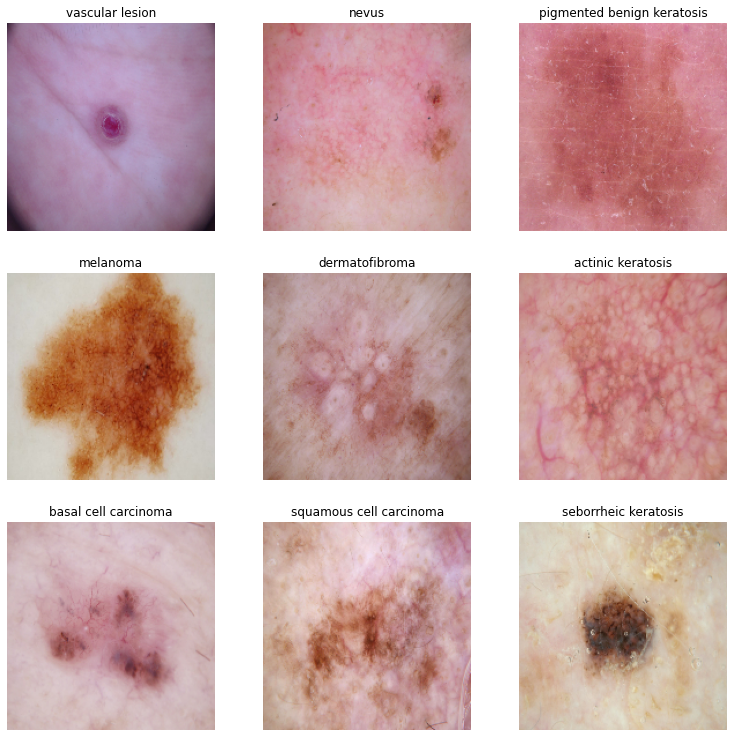

In [ ]:
##visualizing one instance of all the nine classes
import matplotlib.pyplot as plt
plt.figure(figsize=(13,13))
class_seen = []
image_count = 0
for images,labels in train_ds.take(10):
    for i in range(32):
        if class_names[labels[i]] not in class_seen:
            print(image_count,class_names[labels[i]])
            ax = plt.subplot(3,3,image_count+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
            class_seen.append(class_names[labels[i]])
            image_count+=1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
##Auto Tuning of data
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model  -- Base Model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
#Creating the base model
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),

  layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')], 
  name="Model1")

### Compile the model
Choose an appropirate optimiser and loss function for model training 

###Compiling the model with optimizer adam and loss function to train the model

In [ ]:
### Todo, choose an appropirate optimiser and loss function
## Model Compilation
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### View Model Summary

In [ ]:
# View the summary of all layers
model.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)            0    

### Train the base model with 20 epochs

In [ ]:
## Train the base model with 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 25s 83ms/step - loss: 2.2829 - accuracy: 0.2221 - val_loss: 1.9849 - val_accuracy: 0.2550
Epoch 2/20
56/56 [==============================] - 2s 35ms/step - loss: 1.9037 - accuracy: 0.2706 - val_loss: 1.8687 - val_accuracy: 0.3400
Epoch 3/20
56/56 [==============================] - 2s 35ms/step - loss: 1.7168 - accuracy: 0.3940 - val_loss: 1.8434 - val_accuracy: 0.3893
Epoch 4/20
56/56 [==============================] - 2s 35ms/step - loss: 1.4473 - accuracy: 0.5089 - val_loss: 1.4579 - val_accuracy: 0.5459
Epoch 5/20
56/56 [==============================] - 2s 35ms/step - loss: 1.3350 - accuracy: 0.5296 - val_loss: 1.3590 - val_accuracy: 0.5526
Epoch 6/20
56/56 [==============================] - 2s 35ms/step - loss: 1.2090 - accuracy: 0.5714 - val_loss: 1.4115 - val_accuracy: 0.5481
Epoch 7/20
56/56 [==============================] - 2s 35ms/step - loss: 1.0806 - accuracy: 0.6217 - val_loss: 1.4317 - val_accuracy: 0.5213
Epoch 8/20
56/56 [=====

### On Base Model I have got the training acccuracy of 89.40% and validation accuracy of 53.91% for 20 Epochs. 

### Visualizing the training results

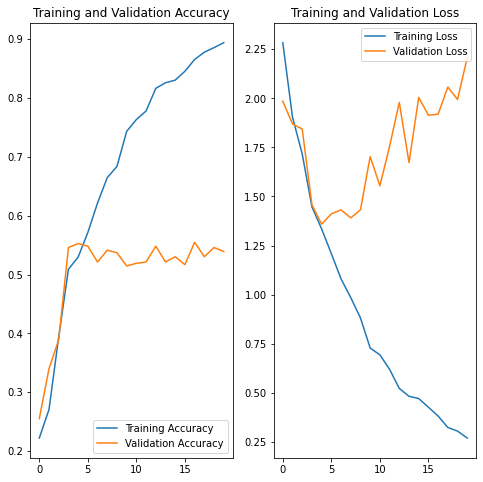

In [ ]:
#Visualization of traning results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


####Findings/Observation
Training Accuracy is high. Validation accuracy is low compared to the Training Accuracy, could see the overfitting in above graph , so its not a good model.
Training Loss is decerasing. Validation Loss is increasing per epoch so it's not a good fit

## Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

### Performing Data Augmentation

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
data_augmentation = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


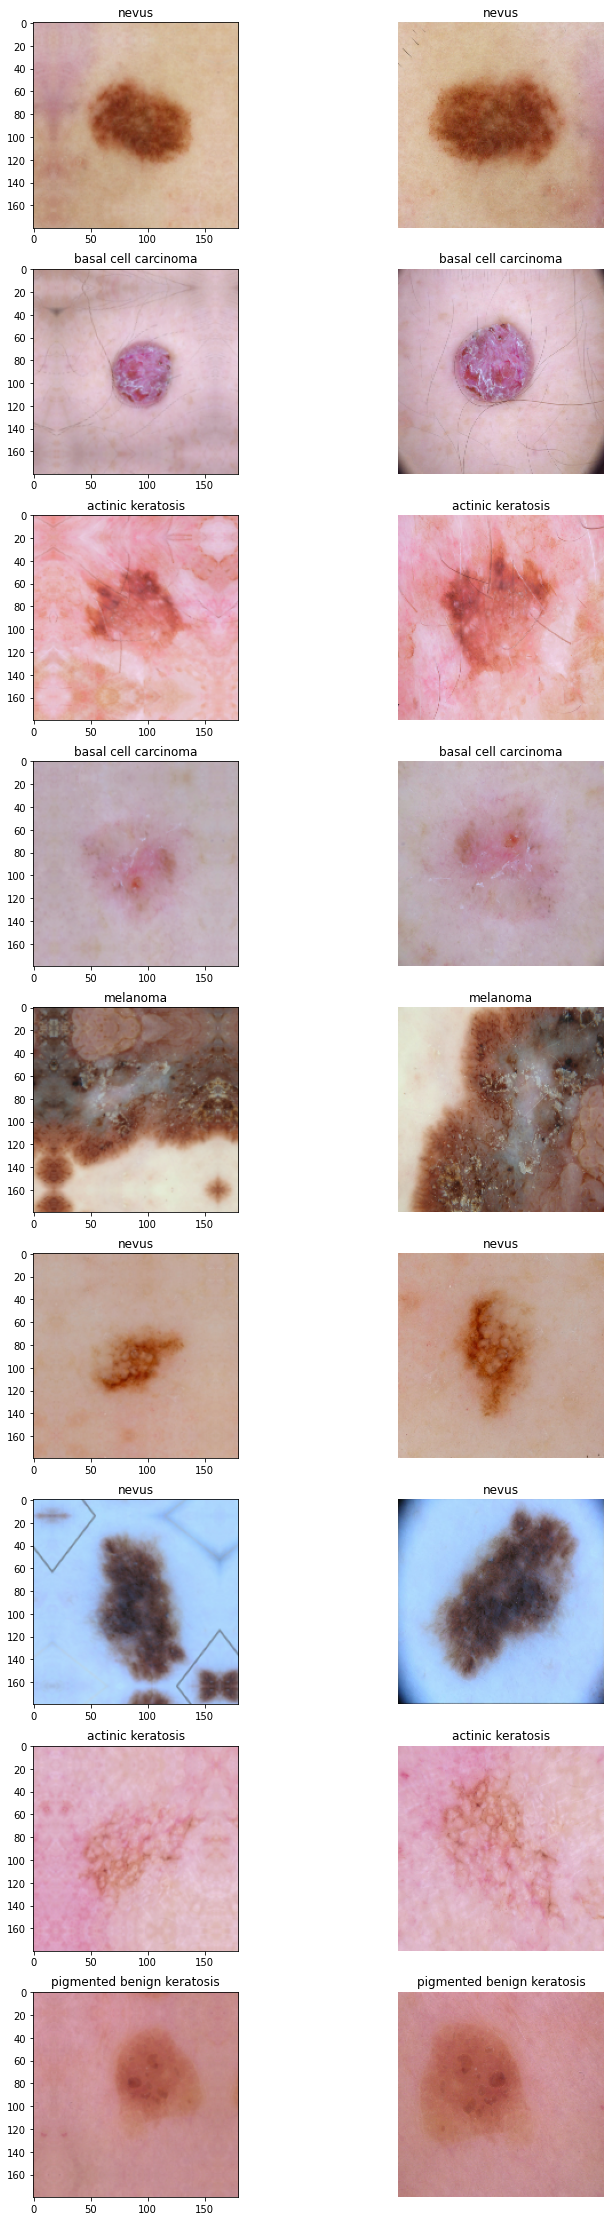

In [ ]:
### Visualize the data
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 40))
for images, labels in list(train_ds.take(1)):
  augmented_image = data_augmentation(images)
  j=1
  for i in range(9):
    ax = plt.subplot(9, 2, j)
    plt.imshow(augmented_image[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    j+=1

    ax = plt.subplot(9, 2, j)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    j+=1

  plt.show()

### Todo: You can use Dropout layer if there is an evidence of overfitting in your findings
### Create the model - Model 2 with Dropout Layer, compile and train the model


In [ ]:
## Model with Dropout Layer

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),

  layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),

  layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),

  layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),  ## Dropout layer

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')],
  name = "Model2")


### Compiling the model

In [ ]:
## Your code goes here
##Compiling and training the model
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

###View Model2 Summary

In [ ]:
## viewing the model2 summary with all layers
model.summary()

Model: "Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                        

### Training the model 2 with 20 epochs

In [ ]:
## Your code goes here, note: train your model for 20 epochs
###Train the Model2 with 20 epochs
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 4s 44ms/step - loss: 2.0348 - accuracy: 0.2282 - val_loss: 1.8514 - val_accuracy: 0.3445
Epoch 2/20
56/56 [==============================] - 2s 41ms/step - loss: 1.7932 - accuracy: 0.3622 - val_loss: 1.5957 - val_accuracy: 0.4519
Epoch 3/20
56/56 [==============================] - 2s 41ms/step - loss: 1.6080 - accuracy: 0.4124 - val_loss: 1.5917 - val_accuracy: 0.4251
Epoch 4/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4831 - accuracy: 0.4704 - val_loss: 1.6631 - val_accuracy: 0.4318
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4548 - accuracy: 0.4833 - val_loss: 1.4834 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 2s 40ms/step - loss: 1.3784 - accuracy: 0.5195 - val_loss: 1.3962 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 1.3940 - accuracy: 0.4994 - val_loss: 1.4074 - val_accuracy: 0.5078
Epoch 8/20
56

####On Second Model, have got the training acccuracy of 58.31% and validation accuracy of 50.66% for 20 Epochs.

### Visualizing the results

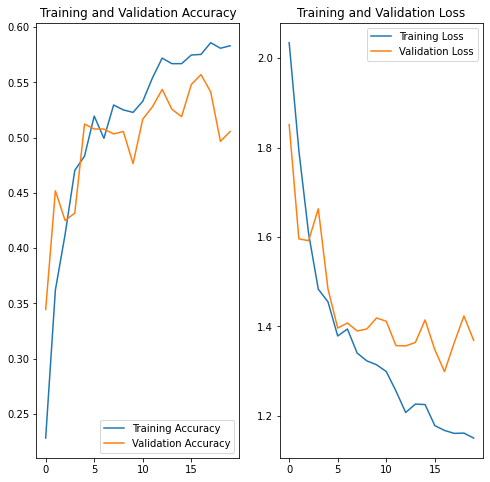

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####Findings/Observation
* Training accuracy has decreased.
* The gap between training and validation accuracies has been reduced.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

### Verifying the Current Class Distribution to see any imbalances 

                            count  percentage
pigmented benign keratosis    462        20.6
melanoma                      438        19.6
basal cell carcinoma          376        16.8
nevus                         357        15.9
squamous cell carcinoma       181         8.1
vascular lesion               139         6.2
actinic keratosis             114         5.1
dermatofibroma                 95         4.2
seborrheic keratosis           77         3.4


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

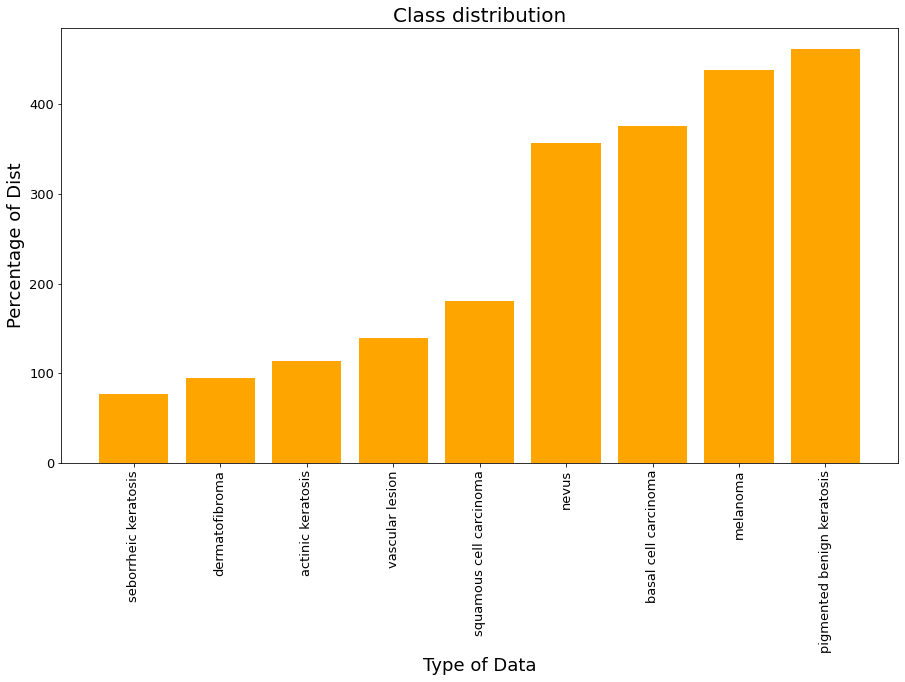

In [ ]:
## Your code goes here.
## Verify the Current Class distribution and see any imbalances 
class_count = {}
path_to_training_dataset= ('Train/')
for i in class_names:
    data_dir = pathlib.Path(path_to_training_dataset + i)
    image_count = len(list(data_dir.glob('*.jpg')))
    class_count[i] = image_count

    
df = pd.DataFrame(class_count.values(), index=class_count.keys(), columns=['count'])
df['percentage'] = round(100 * df['count']/df['count'].sum(), 1)
print(df.sort_values(by=['count'], ascending=False))

class_count = {k: v for k, v in sorted(class_count.items(), key=lambda item: item[1])}

plt.figure(figsize=(15,8))
plt.bar(class_count.keys(), height=class_count.values(), color="orange")
plt.yticks(fontsize=13)
plt.xlabel('Type of Data',fontsize = 18)
plt.ylabel('Percentage of Dist',fontsize = 18)
plt.title('Class distribution',fontsize=20)
plt.xticks(fontsize = 13,rotation=90)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis has least samples with 77 and 3.4% followed by dermatofibroma with 95 amd 4.2% and actinic keratosis with 114 and 5.1%
#### - Which classes dominate the data in terms proportionate number of samples?
 pigmented benign keratosis with  20.6% with   462  and melanoma with 19.6% with 438


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

###Handling Class Imbalance with Augmentor

####Installing the Augmentor 

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
## Instanitiating and executing Pipeline
path_to_training_dataset=('Train/')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4156182990>: 100%|██████████| 500/500 [00:18<00:00, 27.17 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4156149B10>: 100%|██████████| 500/500 [00:18<00:00, 26.59 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F41ED443C50>: 100%|██████████| 500/500 [00:20<00:00, 24.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=965x649 at 0x7F4159289450>: 100%|██████████| 500/500 [01:39<00:00,  5.02 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1019x717 at 0x7F41EA013110>: 100%|██████████| 500/500 [01:24<00:00,  5.93 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F41E01BC350>: 100%|██████████| 500/500 [00:16<00:00, 30.70 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4159025C90>: 100%|██████████| 500/500 [00:41<00:00, 12.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F41ED433850>: 100%|██████████| 500/500 [00:16<00:00, 29.82 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F41E0466990>: 100%|██████████| 500/500 [00:16<00:00, 30.18 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026844.jpg_24e9ba04-5fd7-40ed-b14e-6b261a7d74e9.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025086.jpg_d74d27e0-2325-44ff-ab4d-c95f090b0432.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028615.jpg_25d7400a-8584-44d4-83a0-c340504902ec.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025985.jpg_fcd35e60-3441-4c2d-bdfe-f61c22140285.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025040.jpg_ab5067a7-4b3a-4c76-86f4-ce89273d1abf.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027139.jpg_3ceede97-c1bb-4059-ad3f-70ef315f0246.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028496.jpg_00077d2d-5a8d-4522-b8ea-f4afe5b30a5c.jpg',
 'Train/pigmented benign keratosis

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output','*.jpg'))]
path_list_new

['Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026844.jpg_24e9ba04-5fd7-40ed-b14e-6b261a7d74e9.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025086.jpg_d74d27e0-2325-44ff-ab4d-c95f090b0432.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028615.jpg_25d7400a-8584-44d4-83a0-c340504902ec.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025985.jpg_fcd35e60-3441-4c2d-bdfe-f61c22140285.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025040.jpg_ab5067a7-4b3a-4c76-86f4-ce89273d1abf.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027139.jpg_3ceede97-c1bb-4059-ad3f-70ef315f0246.jpg',
 'Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028496.jpg_00077d2d-5a8d-4522-b8ea-f4afe5b30a5c.jpg',
 'Train/pigmented benign keratosis

In [ ]:
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) 
               for y in glob(os.path.join(data_dir_train, '*','*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict = dict(zip(path_list,lesion_list))

In [ ]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns= ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
original_df

,Path,Label
0,Train/pigmented benign keratosis/output/pigmen...,Train
1,Train/pigmented benign keratosis/output/pigmen...,Train
2,Train/pigmented benign keratosis/output/pigmen...,Train
3,Train/pigmented benign keratosis/output/pigmen...,Train
4,Train/pigmented benign keratosis/output/pigmen...,Train
...,...,...
2234,Train/vascular lesion/output/vascular lesion_o...,Train
2235,Train/vascular lesion/output/vascular lesion_o...,Train
2236,Train/vascular lesion/output/vascular lesion_o...,Train
2237,Train/vascular lesion/output/vascular lesion_o...,Train


In [ ]:
new_df['Label'].value_counts()

Train                         2239
pigmented benign keratosis     500
dermatofibroma                 500
seborrheic keratosis           500
actinic keratosis              500
vascular lesion                500
basal cell carcinoma           500
squamous cell carcinoma        500
nevus                          500
melanoma                       500
Name: Label, dtype: int64

####Class Count and visualize the distribution

                            count  percentage
Train                        2239        33.2
pigmented benign keratosis    500         7.4
dermatofibroma                500         7.4
seborrheic keratosis          500         7.4
actinic keratosis             500         7.4
vascular lesion               500         7.4
basal cell carcinoma          500         7.4
squamous cell carcinoma       500         7.4
nevus                         500         7.4
melanoma                      500         7.4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

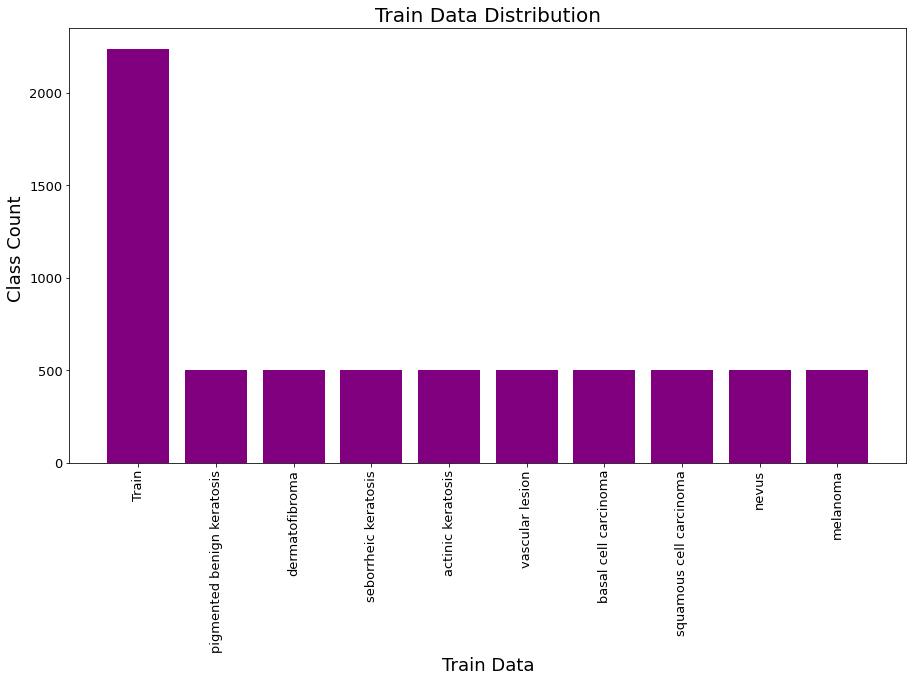

In [ ]:
class_count = dict(new_df['Label'].value_counts())
    
df = pd.DataFrame(class_count.values(), index=class_count.keys(), columns=['count'])
df['percentage'] = round(100 * df['count']/df['count'].sum(), 1)
print(df.sort_values(by=['count'], ascending=False))

plt.figure(figsize=(15,8))
plt.bar(class_count.keys(), height=class_count.values(), color="purple")
plt.yticks(fontsize=13)
plt.xlabel('Train Data',fontsize = 18)
plt.ylabel('Class Count ',fontsize = 18)
plt.title('Train Data Distribution',fontsize=20)
plt.xticks(fontsize = 13,rotation=90)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

####Model 3 On the above data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
## Creating train dataset
data_dir_train= ('Train/')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
## Creating Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

#### Creating Model 3

In [ ]:
## your code goes here
##Creating model 3
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),  ## Dropout layer

  layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),  ## Dropout layer
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),  ## Dropout layer
  layers.Dense(num_classes, activation='softmax')],
  name = "Model3")

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
## Compile the model
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 45, 45, 32)        0    

#### **Todo:**  Train your model   

### Training the Model 3

In [ ]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/30
169/169 [==============================] - 26s 142ms/step - loss: 2.0222 - accuracy: 0.2034 - val_loss: 1.8883 - val_accuracy: 0.3244
Epoch 2/30
169/169 [==============================] - 26s 149ms/step - loss: 1.7405 - accuracy: 0.3231 - val_loss: 1.5615 - val_accuracy: 0.3979
Epoch 3/30
169/169 [==============================] - 25s 142ms/step - loss: 1.5824 - accuracy: 0.3991 - val_loss: 1.4090 - val_accuracy: 0.4588
Epoch 4/30
169/169 [==============================] - 24s 140ms/step - loss: 1.4360 - accuracy: 0.4549 - val_loss: 1.4120 - val_accuracy: 0.4736
Epoch 5/30
169/169 [==============================] - 24s 140ms/step - loss: 1.3273 - accuracy: 0.4904 - val_loss: 1.3299 - val_accuracy: 0.5026
Epoch 6/30
169/169 [==============================] - 24s 140ms/step - loss: 1.2936 - accuracy: 0.5065 - val_loss: 1.1373 - val_accuracy: 0.5716
Epoch 7/30
169/169 [==============================] - 24s 140ms/step - loss: 1.1560 - accuracy: 0.5684 - val_loss: 1.0956 - val_ac

####Findings from above result

Accuracy: 0.8542 - val_accuracy: 0.8382
- val_loss: 0.5263 
loss: 0.3881

#### **Todo:**  Visualize the model results

###Visualizing the Model3 result

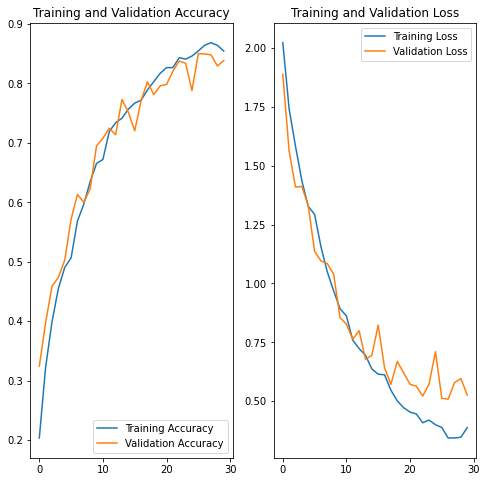

In [ ]:
### Visualizing the model3 result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


On Model 3 the training accuracy is 86.39% . The validation accuracy is 82.93%. Gap between train accuracy and validation accuracy is less. 

Yes now overfitting was avoided through class re-balancing. Though the model accuracy has improved, the class rebalance has helped to treat the overfitting to some extent. 

Best models could be built by adding more epochs, more layers, neurons or adding dropout layers.



Actual Image Class melanoma
Predictive Image Class melanoma


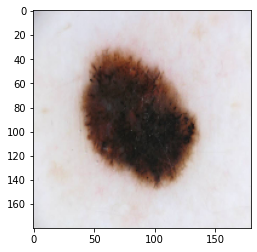

In [ ]:
from glob import glob
test_img_path = os.path.join(data_dir_test, class_names[3], '*')
test_img = glob(test_img_path)
test_img = tf.keras.utils.load_img(test_img[-1],target_size=(img_height,img_width,3))
plt.imshow(test_img)
plt.grid(False)

pred_img = np.expand_dims(test_img,axis=0)
predict_img = model.predict(pred_img)
pred = np.argmax(predict_img)
predict_class = class_names[pred]
print("Actual Image Class "+ class_names[3] +'\n'+ "Predictive Image Class "+predict_class )

####Observation

From the above image observed that actual and predicted image is same, both are belong to melanoma